<a href="https://colab.research.google.com/github/HARSHAZGREAT/Transfinitte23-/blob/main/transfinitte_image_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow

In [40]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [41]:
iloc = "/content/gdrive/MyDrive/ML datasets/aircraft-skin-defects-new-dataset.v4-classification-isolated-5-classes-grayscale-prep.coco/test/IMG_20230512_120754_jpg.rf.ed2a5a21f93c24ebc1af735c1af22c23.jpg"

In [42]:
image = cv2.imread(iloc, cv2.IMREAD_GRAYSCALE)
print(image)

[[179 180 182 ... 177 180 182]
 [182 183 184 ... 181 184 186]
 [183 183 183 ... 186 188 190]
 ...
 [156 146 142 ...  73  76  79]
 [157 153 152 ...  73  71  71]
 [163 163 165 ...  81  78  73]]


In [43]:
#FFT
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)

magnitude = np.log(np.abs(fft_shifted) + 1)

In [44]:
sigma = 1.5
size = 5
h = np.exp(-(np.arange(size) - size // 2) * 2 / (2 * sigma * 2))
self_filtered = np.outer(h, h)

if self_filtered.shape != magnitude.shape:
    self_filtered = cv2.resize(self_filtered, (magnitude.shape[1], magnitude.shape[0]))

filtered_magnitude = magnitude * self_filtered

In [45]:
# Suppress periodic patterns
notch_center = (filtered_magnitude.shape[0] // 2, filtered_magnitude.shape[1] // 2)
radius = 20
for i in range(filtered_magnitude.shape[0]):
    for j in range(filtered_magnitude.shape[1]):
        if np.sqrt((i - notch_center[0]) * 2 + (j - notch_center[1]) * 2) < radius:
            filtered_magnitude[i, j] = 0

<ipython-input-45-c90bbea8627c>:6: RuntimeWarning: invalid value encountered in sqrt
  if np.sqrt((i - notch_center[0]) * 2 + (j - notch_center[1]) * 2) < radius:


In [46]:
# Inverse FFT
ifft_shifted = np.fft.ifftshift(np.exp(filtered_magnitude) - 1)
restored_image = np.fft.ifft2(ifft_shifted).real

In [47]:
# Edge enhancement - Sobel
sobel_x = cv2.Sobel(restored_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(restored_image, cv2.CV_64F, 0, 1, ksize=3)
edge_enhanced_image = cv2.addWeighted(restored_image, 1, sobel_x, 0.5, 0)

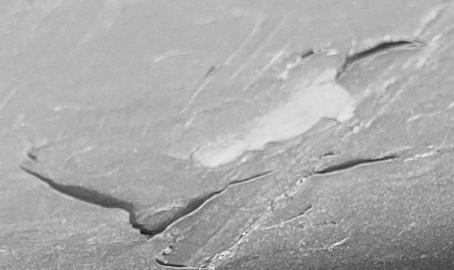

In [48]:
cv2_imshow(image)